In [ ]:
!pip install persiantools
!pip install jdatetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# خواندن دیتاست
df = pd.read_excel('/content/drive/MyDrive/data1.xlsx')

In [ ]:
# تغییر نام ستون‌ها
df.rename(columns={'Unnamed: 5': 'month'}, inplace=True)

In [ ]:
# حذف ستون‌های ۷، ۸ و ۹
df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

In [ ]:
df.head()

,year,index,inf,ex,g,month,coin
0,1370.0,472.1,20.000000,1420.2,12.293367,سال 1370 فروردین,128.2
1,1371.0,435.1,25.000000,1498.0,3.064414,اردیبهشت,123.7
2,1372.0,403.5,20.000000,1806.0,1.355646,خرداد,121.6
3,1373.0,694.4,38.888889,2635.0,-0.921388,تیر,123.5
4,1374.0,1549.4,48.000000,4036.0,2.684703,مرداد,120.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    31 non-null     float64
 1   index   30 non-null     float64
 2   inf     28 non-null     float64
 3   ex      29 non-null     float64
 4   g       30 non-null     float64
 5   month   372 non-null    object 
 6   coin    372 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.5+ KB


In [ ]:
df.isna().sum()

year     341
index    342
inf      344
ex       343
g        342
month      0
coin       0
dtype: int64

In [ ]:
def sum_by_twelve(df, column_name):
    # Extract the specified column from the data frame
    column = df[column_name]
    
    # Create an empty list to store the sums
    sums = []
    
    # Loop through the column in increments of 12 rows
    for i in range(0, len(column), 12):
        # Add up the values in the next 12 rows and append to the list of sums
        sums.append(sum(column[i:i+12]))
    
    return sums

In [ ]:
sum_by_twelve(df, 'coin')

[1494.7,
 1490.8999999999999,
 1985.3000000000002,
 3671.6000000000004,
 5318.7,
 4959.3,
 4664.8,
 5416.300000000001,
 7044.000000000001,
 7267.5,
 7309.000000000001,
 8408.6,
 10340.399999999998,
 12566.2,
 14772.1,
 20158.8,
 22955.3,
 27819.4,
 29657.8,
 42057.0,
 70648.0,
 122100.0,
 125715.0,
 115511.0,
 111817.0,
 132177.0,
 155284.0,
 401587.0,
 543668.0,
 1216314.0,
 1372816.0]

In [ ]:
import numpy as np 
coin_yearly = np.array(sum_by_twelve(df, 'coin'))
coin_yearly = np.concatenate((coin_yearly, np.full(341, np.nan)))

df['coin_yearly'] = coin_yearly

In [ ]:
df_new = df.drop(['month', 'coin'], axis=1)
df_new.head()

,year,index,inf,ex,g,coin_yearly
0,1370.0,472.1,20.000000,1420.2,12.293367,1494.7
1,1371.0,435.1,25.000000,1498.0,3.064414,1490.9
2,1372.0,403.5,20.000000,1806.0,1.355646,1985.3
3,1373.0,694.4,38.888889,2635.0,-0.921388,3671.6
4,1374.0,1549.4,48.000000,4036.0,2.684703,5318.7


شناسایی تاثیر هر متغیر بر شاخص بورس

In [ ]:
import statsmodels.api as sm
df = df.dropna() #NaN یا Inf هستند حذف ردیف‌هایی که شامل 

X = df[['year', 'inf', 'ex', 'g', 'coin']] # متغیرهای مستقل
y = df['index'] # متغیر وابسته

# اضافه کردن عبارت "const" به متغیرهای مستقل برای به دست آوردن عدد ثابت در مدل
X = sm.add_constant(X)

# ساخت مدل رگرسیون خطی
model = sm.OLS(y, X)

# اجرای مدل
results = model.fit()

# چاپ خلاصه‌ای از نتایج
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     289.1
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           3.09e-17
Time:                        08:03:02   Log-Likelihood:                -301.74
No. Observations:                  25   AIC:                             615.5
Df Residuals:                      19   BIC:                             622.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.863e+06   2.44e+06      2.817      0.0


برای ارزیابی عملکرد مدل، می‌توان به مقادیر معیارهای زیر توجه کرد

R-squared و Adj. R-squared 

 R-squared  مقدار  
برابر با 0.987 است، که نشان دهنده این است که 98.7% از تغییرات شاخص بورس توسط متغیرهای مستقل در مدل توضیح داده شده است 
  
Adj. R-squared مقدار
 
  نیز با 0.984 نشان می‌دهد که مدل در برخورد با داده‌های جدید همچنان دقت خوبی 
  دارد

.
.

معیارهای دیگری همچون   F-statistic و Prob (F-statistic) 
 نیز برای ارزیابی عملکرد مدل مفید هستند. 

مقدار F-statistic 
برابر با 289.1 است که نشان دهنده عدم اتفاق تصادفی میان متغیرهای مستقل و وابسته است 
.
.

Prob (F-statistic) 
نیز با مقدار کمتر از 0.05 نشان می‌دهد که مدل در کل دارای عملکرد مطلوبی برای پیش‌بینی مقدار شاخص بورس است



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


inf = 40
ex = 300000
g = 3
coin = 130500

data = {
    'inf': [inf],
    'ex': [ex],
    'g': [g],
    'coin': [coin]
}

df = pd.DataFrame(data)

X = df.drop('coin', axis=1)
y = df['coin']

model = LinearRegression().fit(X, y)

predicted_coin_price = model.predict([[inf, ex, g]])[0]
print('پیش‌بینی قیمت سکه: ', predicted_coin_price)



پیش‌بینی قیمت سکه:  130500.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# خواندن داده‌ها
df = pd.read_excel('/content/drive/MyDrive/data1.xlsx')
# تغییر نام ستون‌ها
df.rename(columns={'Unnamed: 5': 'month'}, inplace=True)
# حذف ستون‌های ۷، ۸ و ۹
df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)
# حذف ستون‌هایی که برای پیش‌بینی مورد نیاز نیستند
df.drop(['year', 'index', 'month'], axis=1, inplace=True)
df = df.dropna()
# جایگذاری مقادیر خالی با میانگین ستون مربوطه
df.fillna(df.mean(), inplace=True)

# تقسیم داده‌ها به دو بخش train و test
X = df.drop('coin', axis=1)
y = df['coin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل و آموزش آن بر روی داده‌های train
model = LinearRegression().fit(X_train, y_train)

# پیش‌بینی قیمت سکه بر روی داده‌های test
y_pred = model.predict(X_test)

# محاسبه معیارهای خطای پیش‌بینی
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)


MSE: 25.198055131000526
R-squared: 0.5842076625386654


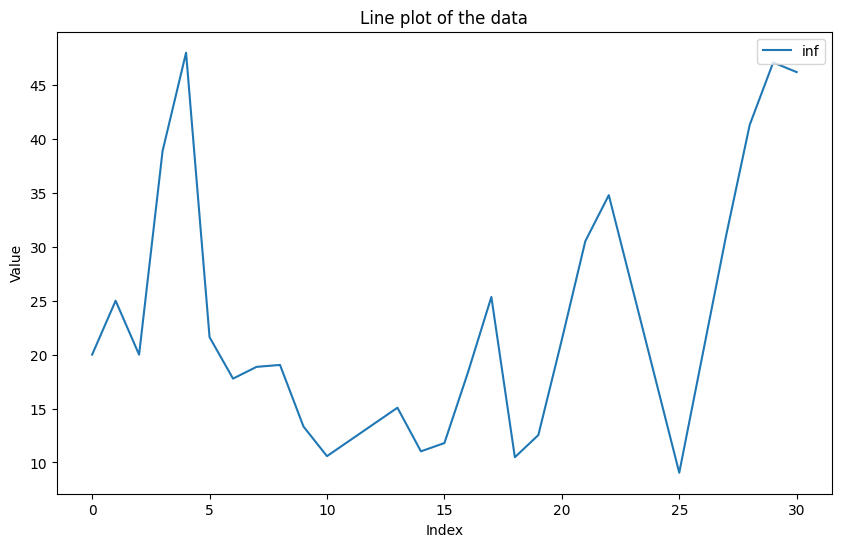

In [ ]:
import matplotlib.pyplot as plt

# ساخت دیتافریم جدید با ستون‌های مورد نظر
df_plt = df[['inf']]

# نمودار خطی
df_plt.plot(kind='line', figsize=(10, 6))

# نام داده‌ها در هر ستون
plt.legend(loc='upper right')

# نام محور افقی
plt.xlabel('Index')

# نام محور عمودی
plt.ylabel('Value')

# عنوان نمودار
plt.title('Line plot of the data')

# نمایش نمودار
plt.show()



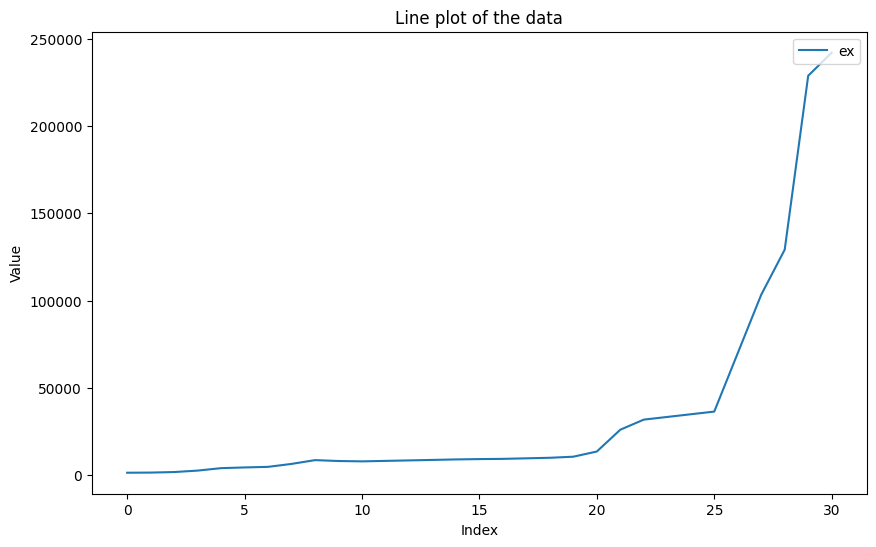

In [ ]:
import matplotlib.pyplot as plt

# ساخت دیتافریم جدید با ستون‌های مورد نظر
df_plt = df[['ex']]

# نمودار خطی
df_plt.plot(kind='line', figsize=(10, 6))

# نام داده‌ها در هر ستون
plt.legend(loc='upper right')

# نام محور افقی
plt.xlabel('Index')

# نام محور عمودی
plt.ylabel('Value')

# عنوان نمودار
plt.title('Line plot of the data')

# نمایش نمودار
plt.show()



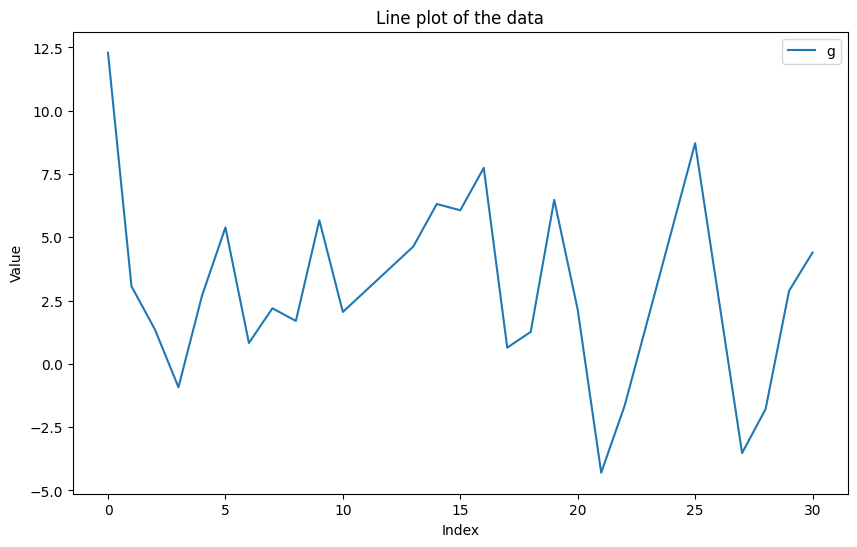

In [ ]:
import matplotlib.pyplot as plt

# ساخت دیتافریم جدید با ستون‌های مورد نظر
df_plt = df[['g']]

# نمودار خطی
df_plt.plot(kind='line', figsize=(10, 6))

# نام داده‌ها در هر ستون
plt.legend(loc='upper right')

# نام محور افقی
plt.xlabel('Index')

# نام محور عمودی
plt.ylabel('Value')

# عنوان نمودار
plt.title('Line plot of the data')

# نمایش نمودار
plt.show()


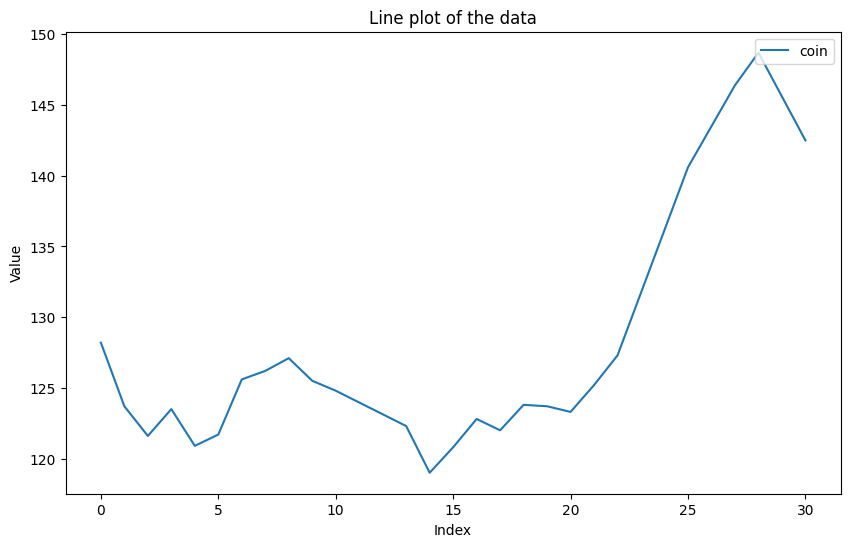

In [ ]:
import matplotlib.pyplot as plt

# ساخت دیتافریم جدید با ستون‌های مورد نظر
df_plt = df[['coin']]

# نمودار خطی
df_plt.plot(kind='line', figsize=(10, 6))

# نام داده‌ها در هر ستون
plt.legend(loc='upper right')

# نام محور افقی
plt.xlabel('Index')

# نام محور عمودی
plt.ylabel('Value')

# عنوان نمودار
plt.title('Line plot of the data')

# نمایش نمودار
plt.show()


In [ ]:
corr_matrix = df.corr()
corr_matrix.iloc[:, -1].sort_values(ascending=False)


coin    1.000000
ex      0.828312
inf     0.481382
g      -0.189393
Name: coin, dtype: float64


با توجه به خروجی کد بالا ex متغییر  
یشترین همبستگی با شاخص بورس دارد  (نرخ ارز) 

متغیر(g) 
 کمترین همبستگی را دارد 

In [ ]:
import pandas as pd
corr = df.corr()

# ایجاد دیتافریمی با نتایج همبستگی
corr_df = pd.DataFrame({'corr_coef': corr['coin']})



In [ ]:

# افزودن نام متغیرها به دیتافریم
corr_df.index.name = 'variable'
corr_df.reset_index(inplace=True)

# ذخیره دیتافریم در فایل اکسل
corr_df.to_excel('correlation_results.xlsx', index=False)
